# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

In [ ]:
#판매량 예측을 목표로 함. 따라서 하루매출이 목표변수가 됨. 
"""
ID: 매장과 날짜들 혹은 타임스탬프
Store: 고유한 매장 ID
Sales:
customers: 주어진 날의 고객 수
open: 매장이 열었는지 닫았는지 유무, 0은 닫힘 1은 열림 
promo: 판촉 실행 여부
stateholiday: a=공휴일, b=부활절 휴일, c= 크리스마스, 0=공휴일 아님
schoolholiday: 방학, 매장과 날짜 조합의 거래가 공립학교 휴교의 영향을 받았는지 아닌지
"""

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

In [ ]:
"""
storetype: 어떤 유형의 상점인지(a,b,c,d)
assortment:매장의 넓이와 위치에 따른 것 a:기본, b: 특별한 곳, c: 확장된 곳 
competitiondistance: 가장 가까운 경쟁 매장에서의 거리
competitionopensince[Month/Year]:경쟁사가 개업한 날짜
"""

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

In [ ]:
"""
promo2: 매장이 추가적인 판촉을 원하거나 판촉을 계속하길 원하면 promo2 이용. 1이면 매장이 참여하고 있음 0이면 매장이 참여하지 않고있음
promo2since[year/week]:매장이 promo2에 참여하기 시작한 날짜
promointerval:promo2가 실행된 간격
"""

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# TASK #2: IMPORT LIBRARIES AND DATASET 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [45]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory


TASK #2.1: IMPORT SALES TRAINING DATA

In [46]:
# You have to include the full link to the csv file containing your dataset

sales_train_df=pd.read_csv("./train.csv")

C:\Users\admin\anaconda3\envs\yolo\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
sales_train_df.head(5)
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [48]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [49]:
sales_train_df.info()
# 9 columns in total 
# 8 features, each contains 1017209 data points
# 1 target variable (sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [50]:
sales_train_df.describe()
#NAN : 잘못된 입력으로 인해 계산을 할 수 없음을 나타내는 기호
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


TASK #2.2: IMPORT STORE INFORMATION DATA

In [51]:
store_info_df = pd.read_csv("./store.csv")
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [52]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [53]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study 
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [54]:
# on average, the competition distance is 5404 meters away (5.4 kms)
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# TASK #3: EXPLORE DATASET

TASK #3.1: EXPLORE SALES TRAINING DATA

<AxesSubplot:>

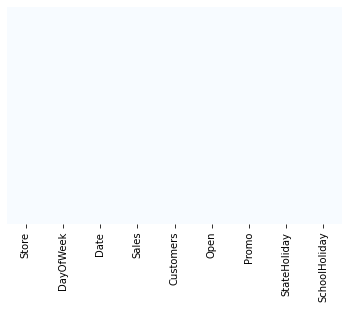

In [55]:
# Let's see if we have any missing data, luckily we don't!
# 누락된 데이터가 있는지 확인
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

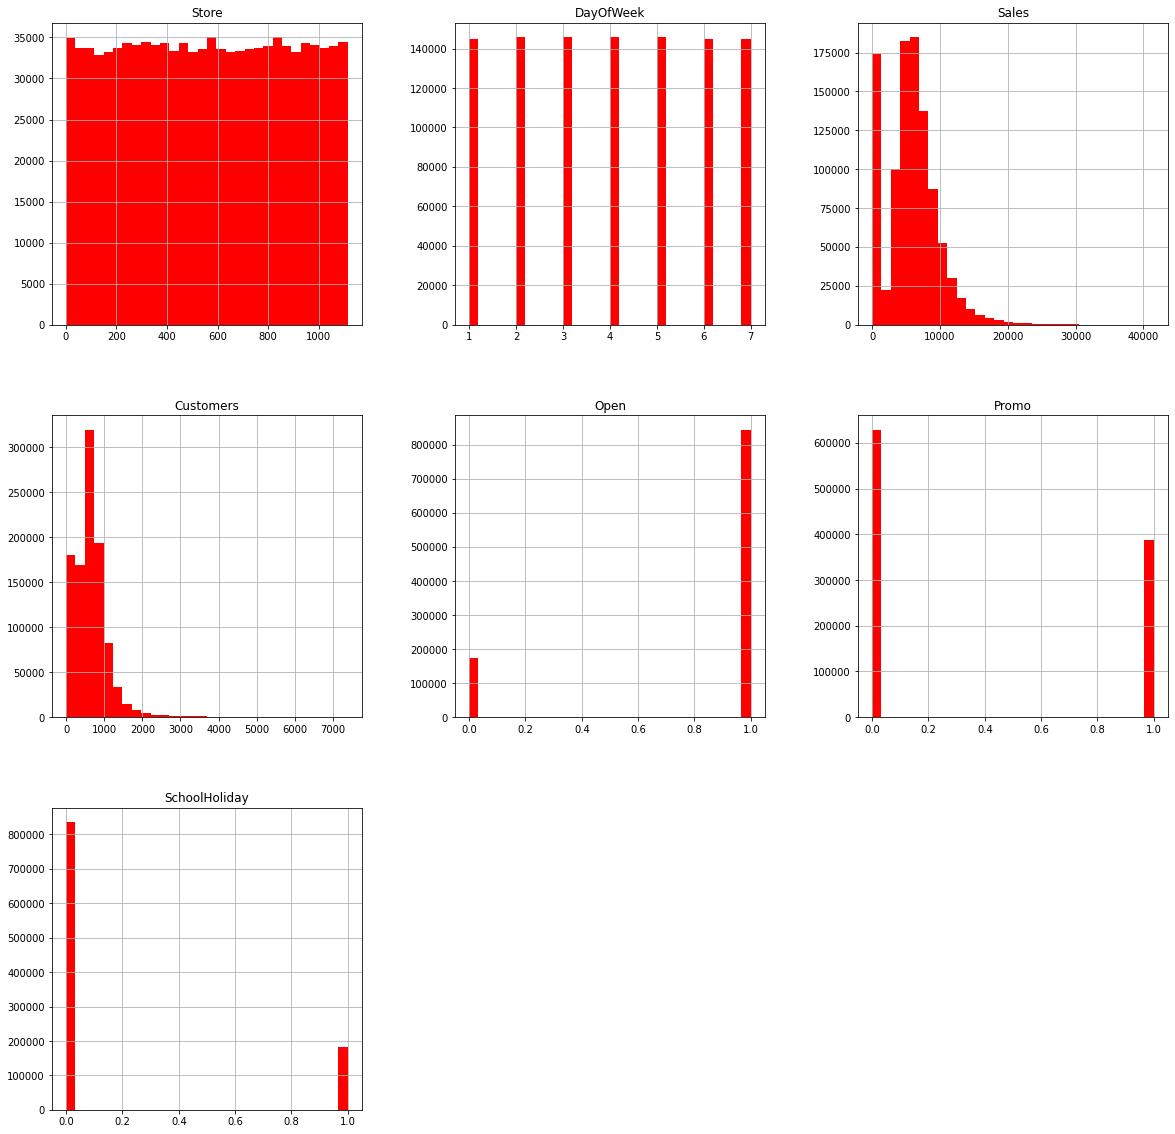

In [56]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time
sales_train_df.hist(bins=30, figsize=[20,20], color='r')
#store 부분을 봤을때 1000개 가량되는 모든 매장에서 모든 데이터가 균등하고 분포되어 있음을 확인.
#이는 각각의 매장에서 대표적인 데이터가 나온다는 것을 의미

In [57]:
sales_train_df['Customers'].max()

7388

In [58]:
# Let's see how many stores are open and closed! 
closed_train_df = sales_train_df[sales_train_df['Open']==1]
open_train_df = sales_train_df[sales_train_df['Open']==0]

In [59]:
# Count the number of stores that are open and closed
print('total = ', len(sales_train_df))
print('number of closed stores = ', len(closed_train_df))
print('number of open stores = ', len(open_train_df))

total =  1017209
number of closed stores =  844392
number of open stores =  172817


In [60]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open']==1]

In [61]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [62]:
# Let's drop the open column since it has no meaning now
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [63]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [64]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


TASK #3.2: EXPLORE STORES INFORMATION DATA

<AxesSubplot:>

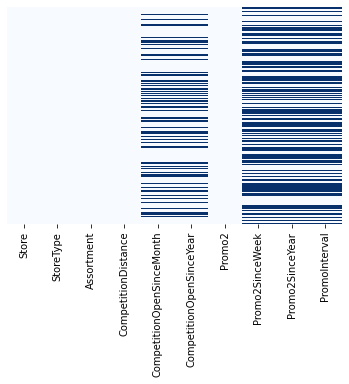

In [65]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
#결측치가 참 많다

In [66]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing 
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [67]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [70]:
store_info_df[store_info_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [73]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros 
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']


In [74]:
for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)
#fillna를 입력 후 0으로 설정하고 이 메모리에 있는 값을 변경

<AxesSubplot:>

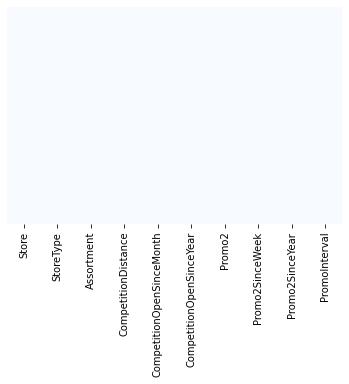

In [77]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
#???
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [79]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

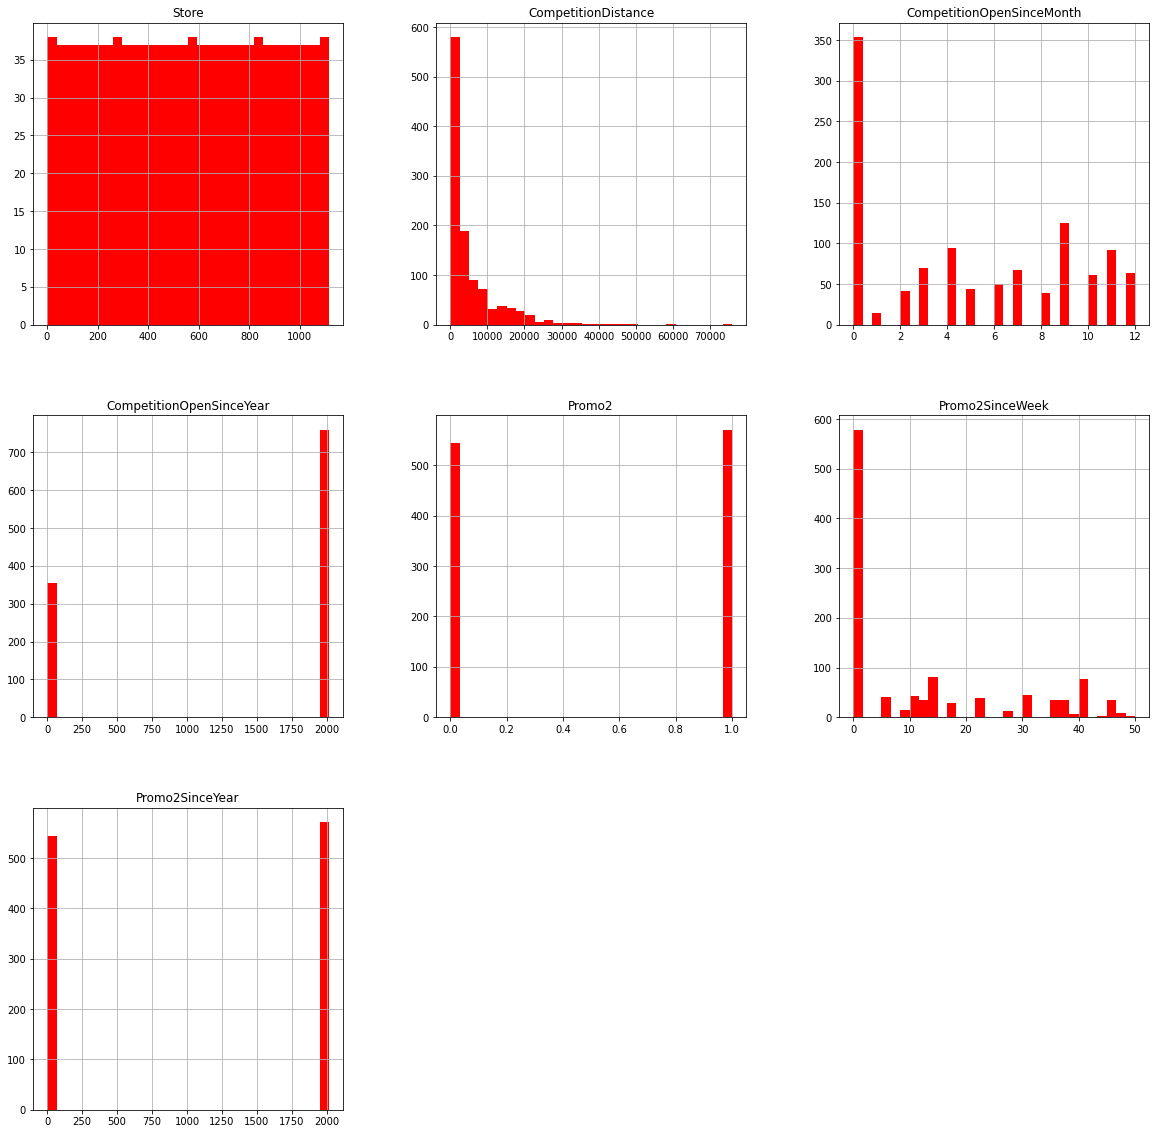

In [82]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)
store_info_df.hist(bins=30, figsize=[20,20], color='r')

TASK #3.3: EXPLORE MERGED DATASET 

In [85]:
# Let's merge both data frames together based on 'store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on='Store')

In [86]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [88]:
#목표변수인 sales와의 상관관계를 본다!!!!!!!!!!!!!!!!!!!!!!!!!
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations
# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<AxesSubplot:>

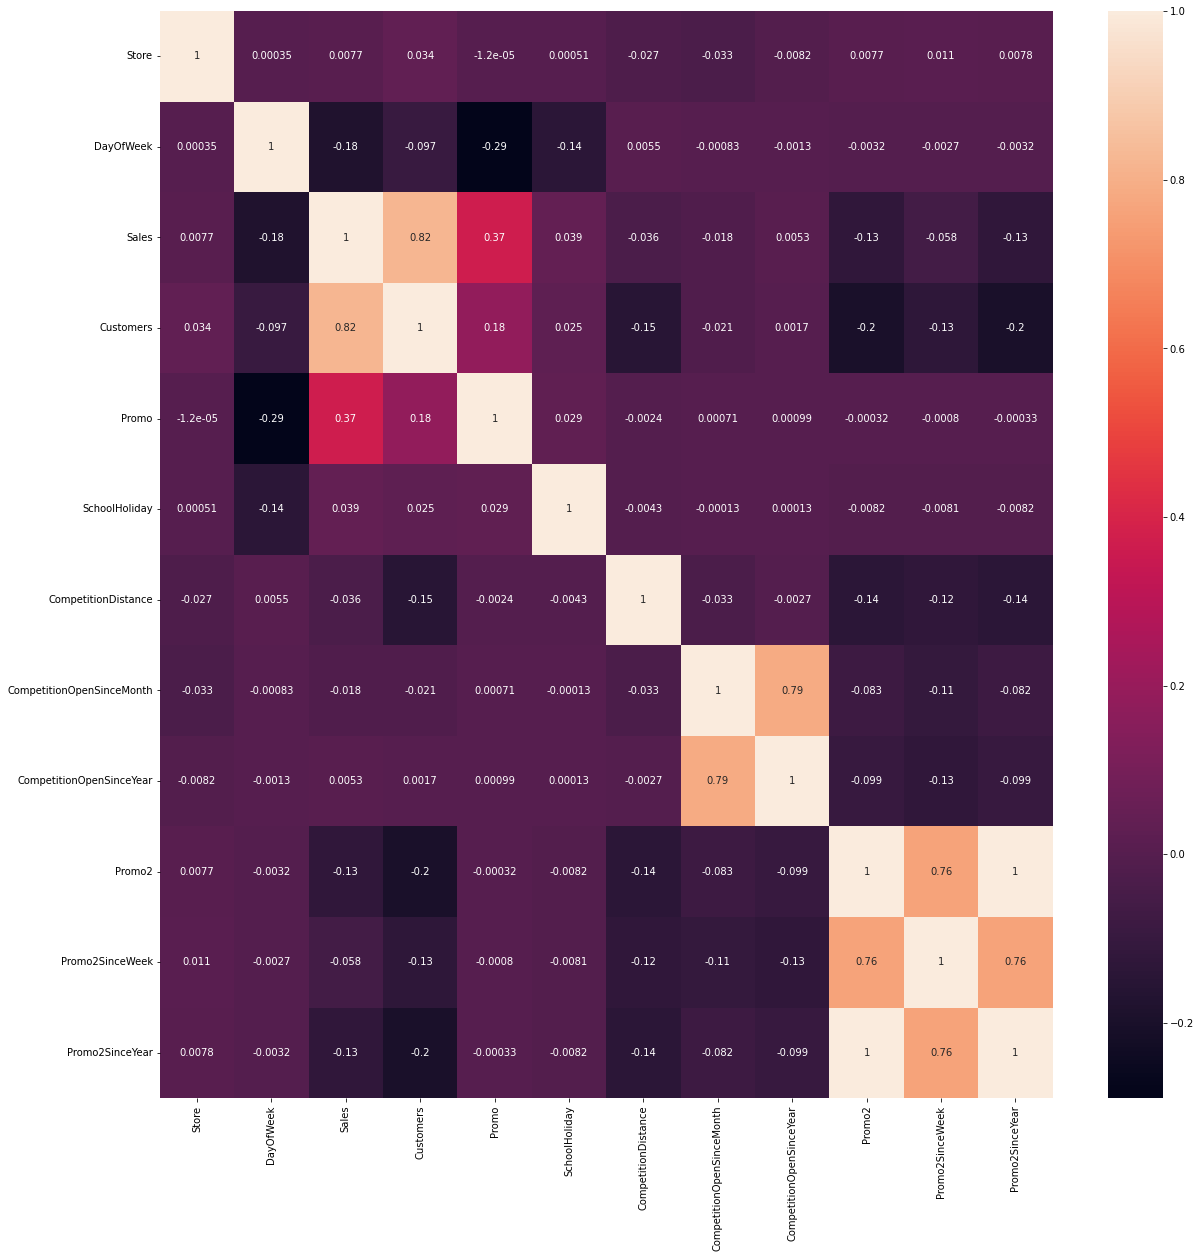

In [89]:
correlations = sales_train_all_df.corr()

f, ax = plt.subplots(figsize=[20,20])
sns.heatmap(correlations, annot=True)
# Customers/Prmo2 and sales are strongly correlated 
#promo와 customers는 sales와 높은 연관성이 있다

In [90]:
# Let's separate the year and put it into a separate column 
sales_train_all_df['Year']= pd.DatetimeIndex(sales_train_all_df['Date']).year

In [91]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013


In [93]:
# Let's do the same for the Day and Month
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [94]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


Text(0.5, 1.0, 'Average customers per month')

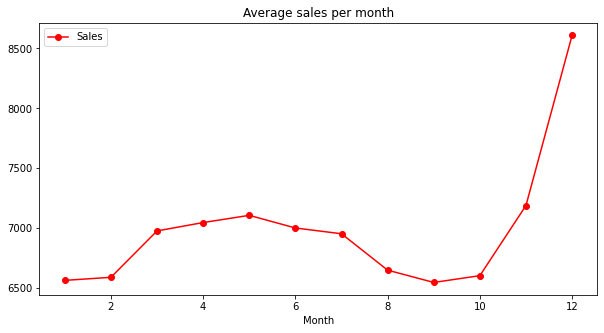

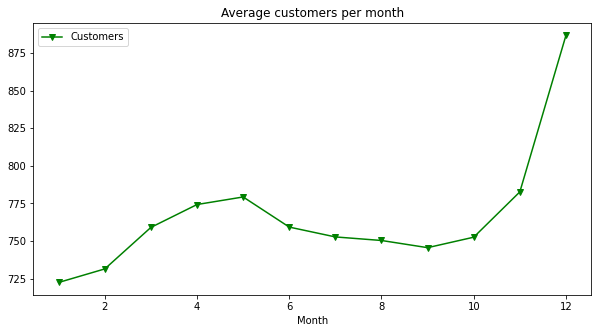

In [100]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe

#한달 평균 판매액과 고객의 수를 구하고 어느 달이 일 년 중 가장 중요한 달인지 알아보자
#!!!!!

axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize= (10,5), marker='o', color='r')
axis.set_title('Average sales per month')

axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=[10,5], marker='v', color='g')
axis.set_title('Average customers per month')


Text(0.5, 1.0, 'average customers per day')

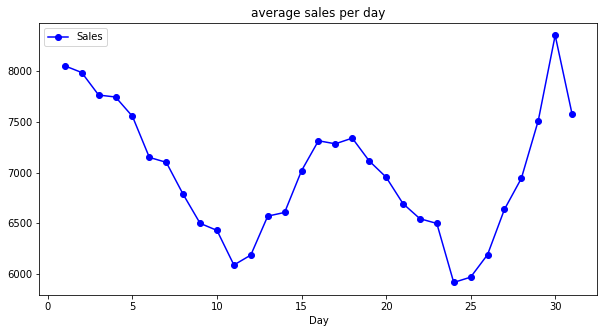

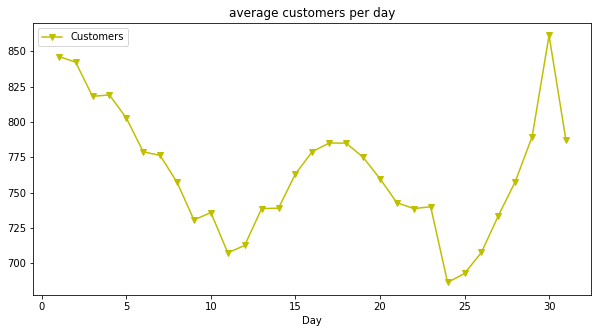

In [101]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

#판매액과 고객수를 일별로 플롯
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('average sales per day')

axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker='v', color='y')
axis.set_title('average customers per day')

Text(0.5, 1.0, 'average customers per Day Of the Week')

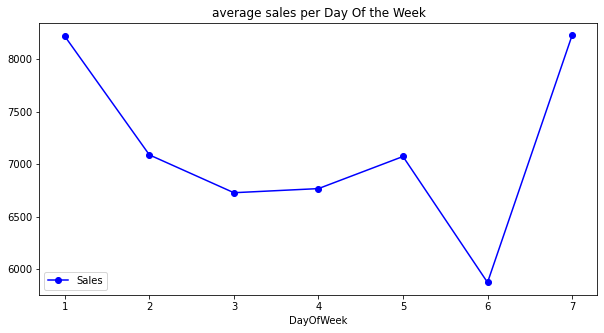

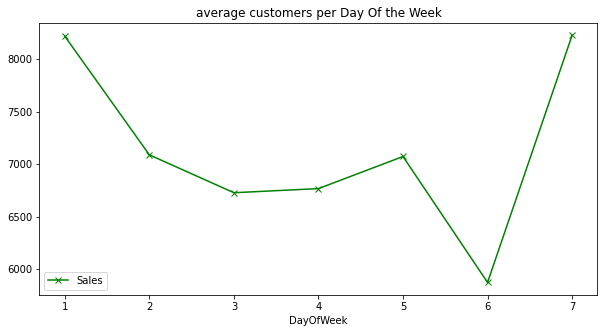

In [107]:
# Let's do the same for the day of the week  (note that 7 = Sunday)
#판매액과 고객수를 요일별로 플롯

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('average sales per Day Of the Week')

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker='x', color='g')
axis.set_title('average customers per Day Of the Week')

#7은 일요일
#가장 판매액이 좋은 날은 일요일

<AxesSubplot:xlabel='Date'>

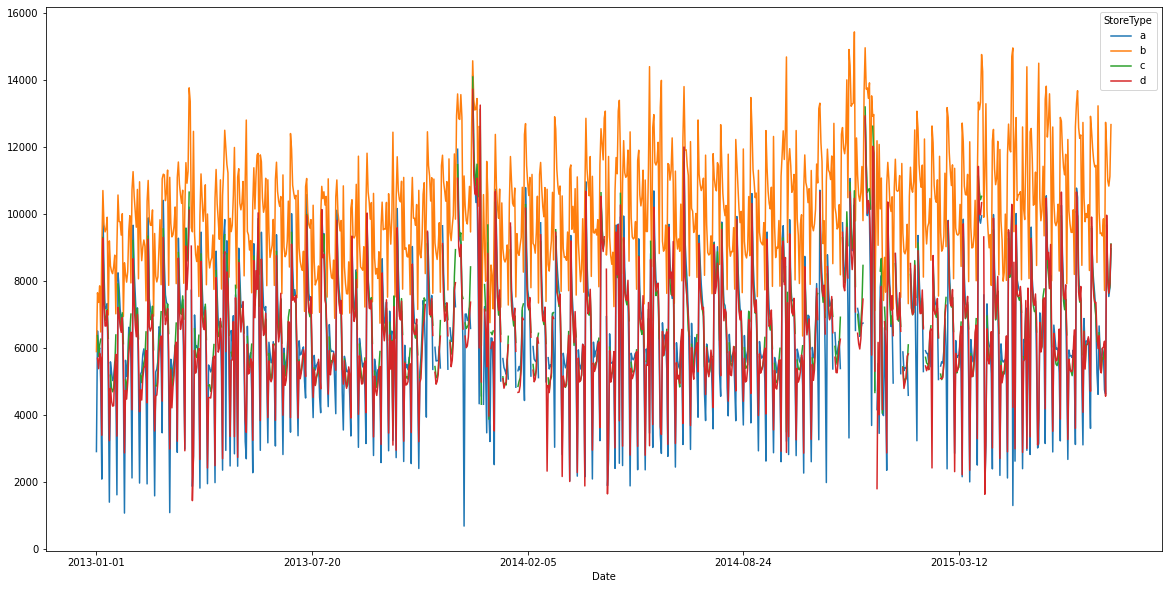

In [115]:
#날짜와 매장 유형에 따라 플롯
#어떤매장 유형이 가장 높은 판매액을 가지는가

fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)
#ax=ax로 데이터를 축에 플롯 
#unstack을 통해 데이터 프레임 재구조화
"""stack : 위에서 아래로 (행방향)
unstack : 왼쪽에서 오른쪽으로 (열방향)"""

#매장 B가 가장 큰 값의 판매액을 보이고 있음.


<AxesSubplot:xlabel='Promo', ylabel='Customers'>

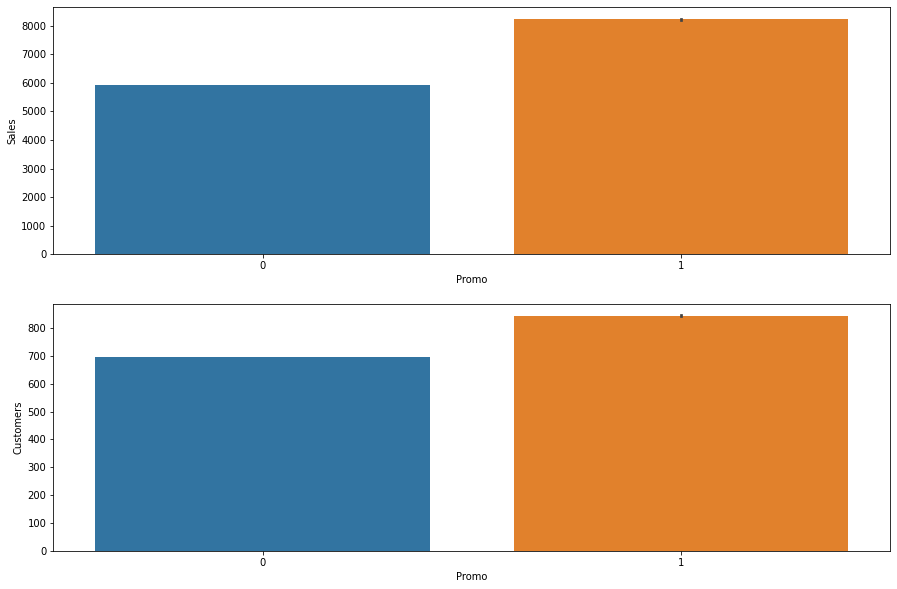

In [119]:
#막대그래프와 바이올린 그래프를 적용해 promo와 sales /promo와 customers 확인
plt.figure(figsize=[15,10])
plt.subplot(211) #2개의 행 한개의열 첫번째 플롯
sns.barplot(x = 'Promo', y='Sales', data=sales_train_all_df)
plt.subplot(212) #2개의 행 한개의열 두번째 플롯
sns.barplot(x = 'Promo', y='Customers', data=sales_train_all_df)


<AxesSubplot:xlabel='Promo', ylabel='Customers'>

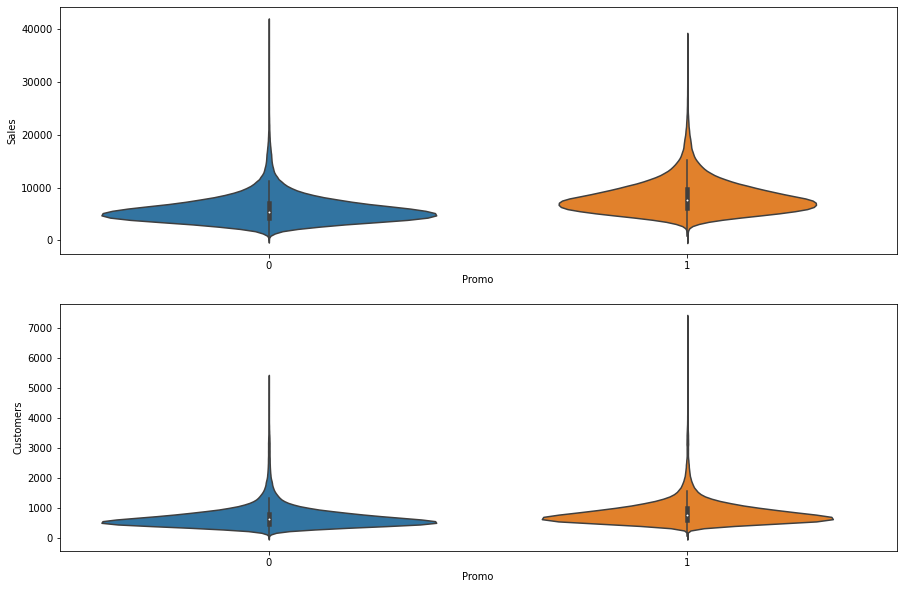

In [126]:
#바이올린 그래프
#막대그래프와 바이올린 그래프를 적용해 promo와 sales /promo와 customers 확인
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y='Sales', data= sales_train_all_df)
plt.subplot(212)
sns.violinplot(x = 'Promo', y='Customers', data= sales_train_all_df)


# TASK #4: UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1I4lBgLaqERF_-lpGYLuht02wJmwcLGG-)

In [127]:
!pip install prophet

  Running setup.py clean for prophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730984 sha256=c79bb84248a79141379dcb9f84fac488654c0176c58bd8682b0d2871ff2c8c96
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\33\6b\a6\1d9dae2323750f635654952afc74aa8f2d982cded163f43895
Successfully built pymeeus
Failed to build prophet
    Running setup.py install for prophet: started
    Running setup.py install for prophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\admin\anaconda3\envs\yolo\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-es2edc2z\\prophet_50a0b8ac754044b989f06dbcc266746f\\setup.py'"'"'; __file__='"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-es2edc2z\\prophet_50a0b8ac754044b989f06dbcc266746f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\admin\AppData\Local\Temp\pip-wheel-p0ru2pxz'
       cwd: C:\Users\admin\AppData\Local\Temp\pip-install-es2edc2z\prophet_50a0b8ac754044b989f06dbcc266746f\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creatin

In [ ]:
"""
페이스북 프로펫
연도별, 주별/일별 계절성과 휴일 효과에 맞는 비선형 추세의 가법 모델을 기반으로
시계열 데이터를 예측하기 위한 절차

-정확하고 빠르다
-자동이다
-도메인 지식 통합(사용자가 수동으로 특정 도메인 지식을 더해 예측을 바꿀 수도 있음)
 
강력한 계절성 효과가 있고 과거 데이터가 많이 있을 때 가장 잘 작동

가법회귀모델
-독립변수 x와 종속변수 Y사이의 관계를 얻고 싶을 때사용
여기서 독립적이란것은 독립변수를 내가 원하는 대로 X를 무엇으로든지 바꿀 수 있다는 것을 의미
따라서 X의 변화를 기반으로 Y 예측
평활함수들을 더해주면 y예측값을 생성해주고 가법 회귀 모델 작동

프로펫은 네가지 요소로 구성된 가법회귀 모델이라고 부르는 것을 만듦

1. 조각별 선형함수
-프로핏이 자동으로 데이터의 변경 지점을 선택하고 추세의 변화 구별
따라서 상승하다 하락하는 데이터를 가지고 있다면 그 데이터의 변화를 기반으로 서로 다른 묶음으로 분류
또한 푸리에 급수를 사용해 모델링된 연간 계절 성분, 주간 계절 성분, 수동으로 제공될 수 있는 휴일 목록이 있음

https://hyperconnect.github.io/2020/03/09/prophet-package.html
"""

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

![alt text](https://drive.google.com/uc?id=16gaoTeeuU5PxNZRHt8n2XyFJ52ft1xb7)

# TASK #5: TRAIN THE MODEL PART A

In [132]:
# import prophet 
from fbprophet import Prophet

In [142]:
#날짜와 판매열의 이름을 ds와 y로 변경해줘야 함
#프로펫을 사용하기 위해서 해야함.

#매장이 1000개 정도 있기 때문에 특정 매장의 미래를 예측하기 위해 Store_ID를 지정
#periods는 미래를 얼마나 길게 예측할 것이지 지정하는 부분
def sales_predictions(Store_ID, sales_df, periods):
    #매장 ID를 기반으로 한 매장과 관련된 특정 데이터 추출
    sales_df= sales_df[sales_df['Store']==Store_ID]
    #rename
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    #판매액 오름차순 정렬, 따라서 가장 오래된 것부터 가장 최근까지 분류해줘야 함. 
    sales_df = sales_df.sort_values('ds')

    model=Prophet() 
    model.fit(sales_df) 
    #미래의 데이터 프레임을 만들었지만 얼마동안 예측할 것인지 periods로 구체화
    future = model.make_future_dataframe(periods = periods)
    #예측
    forecast = model.predict(future)
    #모델 시각화 가능
    figure = model.plot(forecast, xlabel ='Date', ylabel='Sales')
    #요인별 추세
    figure2 = model.plot_components(forecast)
    
#    return sales_df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


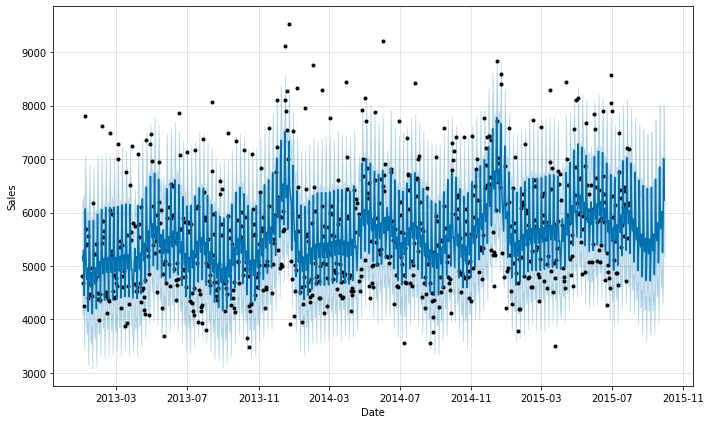

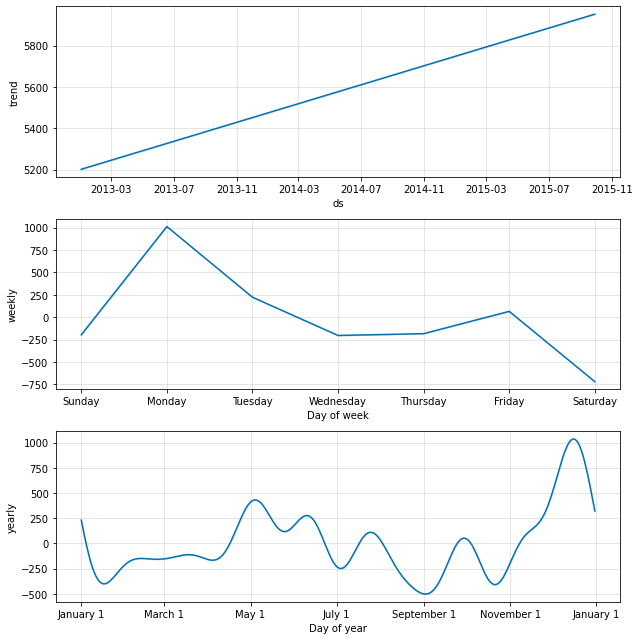

In [143]:
sales_predictions(10, sales_train_all_df, 60)
"""
검은점이 있는 부분은 우리가 가지고 있는 데이터 즉, 과거에 대한 부분

날짜별 추세(Date)는 우측 상향> 실제로 판매량이 증가
요일별 추세(ds)는 월요일에 가장 판매가 많이됨.
주별 추세는 12월이나 1월에 최고점을 찍고 있음.
"""

# TASK #6: TRAIN THE MODEL PART B


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [151]:
# import prophet 
from fbprophet import Prophet

#날짜와 판매열의 이름을 ds와 y로 변경해줘야 함
#프로펫을 사용하기 위해서 해야함.

#매장이 1000개 정도 있기 때문에 특정 매장의 미래를 예측하기 위해 Store_ID를 지정
#periods는 미래를 얼마나 길게 예측할 것이지 지정하는 부분
def sales_predictions(Store_ID, sales_df, periods):
    #매장 ID를 기반으로 한 매장과 관련된 특정 데이터 추출
    sales_df= sales_df[sales_df['Store']==Store_ID]
    #rename
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales':'y'})
    #판매액 오름차순 정렬, 따라서 가장 오래된 것부터 가장 최근까지 분류해줘야 함. 
    sales_df = sales_df.sort_values('ds')

    model=Prophet() 
    model.fit(sales_df) 
    #미래의 데이터 프레임을 만들었지만 얼마동안 예측할 것인지 periods로 구체화
    future = model.make_future_dataframe(periods = periods)
    #예측
    forecast = model.predict(future)
    #모델 시각화 가능
    figure = model.plot(forecast, xlabel ='Date', ylabel='Sales')
    #요인별 추세
    figure2 = model.plot_components(forecast)
    
#    return sales_df

In [156]:
#휴일을 포함해 예측
def sales_predictions2(Store_ID, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store']==Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'sales':'y'})
    sales_df = sales_df.sort_values('ds')
    
    #holiday 추가
    model=Phrophet(holidays = holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)

In [157]:
# Get all the dates pertaining to school holidays 
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday']==1].loc[:, 'Date'].values
print(school_holidays.shape)
school_holidays

(163457,)


array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [158]:
# Get all the dates pertaining to state holidays 
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday']=='a') | (sales_train_all_df['StateHoliday']=='b') |(sales_train_all_df['StateHoliday']=='c')].loc[:, 'Date'].values
print(state_holidays.shape)
state_holidays

(910,)


array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03', '2015-05-01', '2014-10-31',
       '2014-05-01', '2013-10-03', '2013-05-01', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2013-08-15', '2015-05-25',
       '2015-05-14', '2015-05-01', '2015-04-06', '2015-04-03',
       '2015-01-01', '2014-12-26', '2014-12-25', '2014-10-03',
       '2014-06-09', '2014-05-29', '2014-05-01', '2014-04-21',
       '2014-04-18', '2014-01-01', '2013-12-26', '2013-12-25',
       '2013-10-03', '2013-05-20', '2013-05-09', '2013-05-01',
       '2013-04-01', '2013-03-29', '2013-01-01', '2014-10-03',
       '2015-06-04', '2014-06-19', '2013-05-30', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-10-03', '2014-10-03', '2013-

In [161]:
state_holidays = pd.DataFrame({'ds':pd.to_datetime(state_holidays), 'holiday':'state_holyday'})
state_holidays

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [163]:
school_holidays = pd.DataFrame({'ds':pd.to_datetime(school_holidays),
                               'holiday':'school_holiday'})
school_holidays

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [ ]:
# concatenate both school and state holidays 
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

In [ ]:
# Let's make predictions using holidays for a specific store
sales_predictions(6, sales_train_all_df, school_holidays, 90)

# EXCELLENT JOB!